In [1]:
import sys
sys.path.append("../train_fairseq")
import os
import torch
from bart_with_extractor import ProposedModel
from mytask import ProposalTask

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
model = ProposedModel.from_pretrained(
    "/home/naraki/shorten_sum/Expt_ShortenSum/output/finetune-proposal-large_20220830031044",
    checkpoint_file="checkpoint_best.pt",
    data_name_or_path="/home/naraki/shorten_sum/Expt_ShortenSum/output/finetune-proposal-large_20220830031044",
)
model.model.encoder.use_topk_result = True
model = model.eval()
# if torch.cuda.is_available():
#     model = model.cuda().half()

In [3]:
model.model.encoder.extractor.topk_ope

SortedTopK_custom()

In [4]:
source = """Marseille, France (CNN)The French prosecutor leading an investigation into the crash of Germanwings Flight 9525 insisted Wednesday that he was not aware of any video footage from on board the plane. Marseille prosecutor Brice Robin told CNN that "so far no videos were used in the crash investigation." He added, "A person who has such a video needs to immediately give it to the investigators." Robin's comments follow claims by two magazines, German daily Bild and French Paris Match, of a cell phone video showing the harrowing final seconds from on board Germanwings Flight 9525 as it crashed into the French Alps. All 150 on board were killed. Paris Match and Bild reported that the video was recovered from a phone at the wreckage site. The two publications described the supposed video, but did not post it on their websites. The publications said that they watched the video, which was found by a source close to the investigation. "One can hear cries of 'My God' in several languages," Paris Match reported. "Metallic banging can also be heard more than three times, perhaps of the pilot trying to open the cockpit door with a heavy object.  Towards the end, after a heavy shake, stronger than the others, the screaming intensifies. Then nothing." "It is a very disturbing scene," said Julian Reichelt, editor-in-chief of Bild online. An official with France's accident investigation agency, the BEA, said the agency is not aware of any such video. Lt. Col. Jean-Marc Menichini, a French Gendarmerie spokesman in charge of communications on rescue efforts around the Germanwings crash site, told CNN that the reports were "completely wrong" and "unwarranted." Cell phones have been collected at the site, he said, but that they "hadn't been exploited yet." Menichini said he believed the cell phones would need to be sent to the Criminal Research Institute in Rosny sous-Bois, near Paris, in order to be analyzed by specialized technicians working hand-in-hand with investigators. But none of the cell phones found so far have been sent to the institute, Menichini said. Asked whether staff involved in the search could have leaked a memory card to the media, Menichini answered with a categorical "no." Reichelt told "Erin Burnett: Outfront" that he had watched the video and stood by the report, saying Bild and Paris Match are "very confident" that the clip is real. He noted that investigators only revealed they'd recovered cell phones from the crash site after Bild and Paris Match published their reports. "That is something we did not know before. ... Overall we can say many things of the investigation weren't revealed by the investigation at the beginning," he said. What was mental state of Germanwings co-pilot? German airline Lufthansa confirmed Tuesday that co-pilot Andreas Lubitz had battled depression years before he took the controls of Germanwings Flight 9525, which he's accused of deliberately crashing last week in the French Alps. Lubitz told his Lufthansa flight training school in 2009 that he had a "previous episode of severe depression," the airline said Tuesday. Email correspondence between Lubitz and the school discovered in an internal investigation, Lufthansa said, included medical documents he submitted in connection with resuming his flight training. The announcement indicates that Lufthansa, the parent company of Germanwings, knew of Lubitz's battle with depression, allowed him to continue training and ultimately put him in the cockpit. Lufthansa, whose CEO Carsten Spohr previously said Lubitz was 100% fit to fly, described its statement Tuesday as a "swift and seamless clarification" and said it was sharing the information and documents -- including training and medical records -- with public prosecutors. Spohr traveled to the crash site Wednesday, where recovery teams have been working for the past week to recover human remains and plane debris scattered across a steep mountainside. He saw the crisis center set up in Seyne-les-Alpes, laid a wreath in the village of Le Vernet, closer to the crash site, where grieving families have left flowers at a simple stone memorial. Menichini told CNN late Tuesday that no visible human remains were left at the site but recovery teams would keep searching. French President Francois Hollande, speaking Tuesday, said that it should be possible to identify all the victims using DNA analysis by the end of the week, sooner than authorities had previously suggested. In the meantime, the recovery of the victims' personal belongings will start Wednesday, Menichini said. Among those personal belongings could be more cell phones belonging to the 144 passengers and six crew on board. Check out the latest from our correspondents . The details about Lubitz's correspondence with the flight school during his training were among several developments as investigators continued to delve into what caused the crash and Lubitz's possible motive for downing the jet. A Lufthansa spokesperson told CNN on Tuesday that Lubitz had a valid medical certificate, had passed all his examinations and "held all the licenses required." Earlier, a spokesman for the prosecutor's office in Dusseldorf, Christoph Kumpa, said medical records reveal Lubitz suffered from suicidal tendencies at some point before his aviation career and underwent psychotherapy before he got his pilot's license. Kumpa emphasized there's no evidence suggesting Lubitz was suicidal or acting aggressively before the crash. Investigators are looking into whether Lubitz feared his medical condition would cause him to lose his pilot's license, a European government official briefed on the investigation told CNN on Tuesday. While flying was "a big part of his life," the source said, it's only one theory being considered. Another source, a law enforcement official briefed on the investigation, also told CNN that authorities believe the primary motive for Lubitz to bring down the plane was that he feared he would not be allowed to fly because of his medical problems. Lubitz's girlfriend told investigators he had seen an eye doctor and a neuropsychologist, both of whom deemed him unfit to work recently and concluded he had psychological issues, the European government official said. But no matter what details emerge about his previous mental health struggles, there's more to the story, said Brian Russell, a forensic psychologist. "Psychology can explain why somebody would turn rage inward on themselves about the fact that maybe they weren't going to keep doing their job and they're upset about that and so they're suicidal," he said. "But there is no mental illness that explains why somebody then feels entitled to also take that rage and turn it outward on 149 other people who had nothing to do with the person's problems." Germanwings crash compensation: What we know . Who was the captain of Germanwings Flight 9525? CNN's Margot Haddad reported from Marseille and Pamela Brown from Dusseldorf, while Laura Smith-Spark wrote from London. CNN's Frederik Pleitgen, Pamela Boykoff, Antonia Mortensen, Sandrine Amiel and Anna-Maja Rappard contributed to this report."""
tokens = model.encode(source)

In [5]:
tgt_lengths = torch.LongTensor([65])
encoder_out, topk_result = model.extract_topk_result(tokens, tgt_lengths)

In [6]:
topk_result.sum(axis=-1)

tensor([[1.0178, 0.3155, 0.3636,  ..., 0.1973, 0.1646, 1.0183]],
       grad_fn=<SumBackward1>)

In [7]:
topk_result.min()

tensor(8.3113e-11, grad_fn=<MinBackward1>)

(array([368., 198., 118.,  95.,  41.,  52.,  33.,  29.,  39.,  51.]),
 array([0.11737105, 0.20817952, 0.29898798, 0.38979644, 0.48060492,
        0.5714134 , 0.66222185, 0.7530303 , 0.84383875, 0.93464726,
        1.0254557 ], dtype=float32),
 <BarContainer object of 10 artists>)

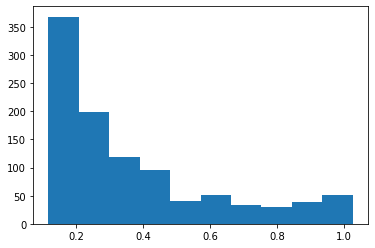

In [8]:
plt.hist(topk_result.sum(axis=-1).data)

(array([230., 226., 152.,  90.,  90.,  56.,  58.,  34.,  40.,  48.]),
 array([0.20138878, 0.28410596, 0.36682314, 0.4495403 , 0.5322575 ,
        0.6149746 , 0.6976918 , 0.780409  , 0.86312616, 0.94584334,
        1.0285605 ], dtype=float32),
 <BarContainer object of 10 artists>)

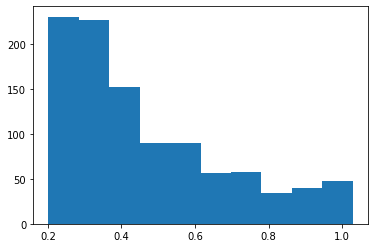

In [9]:
tgt_lengths = torch.LongTensor([85])
encoder_out, topk_result = model.extract_topk_result(tokens, tgt_lengths)
plt.hist(topk_result.sum(axis=-1).data)

(array([681., 116.,  52.,  34.,  19.,  14.,  16.,  11.,  23.,  58.]),
 array([0.02738427, 0.12734668, 0.2273091 , 0.32727152, 0.42723393,
        0.52719635, 0.62715876, 0.7271212 , 0.8270836 , 0.927046  ,
        1.0270084 ], dtype=float32),
 <BarContainer object of 10 artists>)

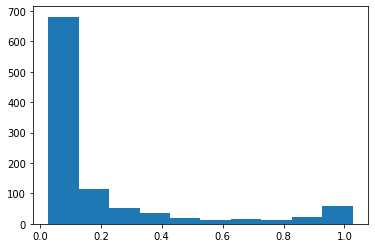

In [10]:
tgt_lengths = torch.LongTensor([30])
model.model.encoder.use_topk_result = True
encoder_out, topk_result = model.extract_topk_result(tokens, tgt_lengths)
plt.hist(topk_result.sum(axis=-1).data)

In [11]:
# input = [self.encode(sentence) for sentence in sentences]
# hypos = self.generate(input, desired_lengths, beam, verbose, **kwargs)
# output= [self.decode(x["tokens"]) for x in hypos]


In [12]:
tgt_lengths = torch.LongTensor([30])
eval_kwargs = dict(lenpen=2.0, max_len_b=140, min_len=50, no_repeat_ngram_size=3)
model.model.encoder.use_topk_result = False
hypos = model.generate([tokens], tgt_lengths, beam=4, **eval_kwargs)
output = [model.decode(x["tokens"]) for x in hypos]
output # 48 tokens

['French prosecutor: "No videos were used in the crash investigation" German media report cell phone video shows harrowing final seconds of Germanwings crash . Prosecutor: "A person who has such a video needs to immediately give it to the investigators"""']

In [13]:
tgt_lengths = torch.LongTensor([30])
# eval_kwargs = dict(lenpen=2.0, max_len_b=140, min_len=55, no_repeat_ngram_size=3)
eval_kwargs = dict(no_repeat_ngram_size=3)
model.model.encoder.use_topk_result = False
hypos = model.generate([tokens], tgt_lengths, beam=4, **eval_kwargs)
output = [model.decode(x["tokens"]) for x in hypos]
with open("../30.out", "w") as f:
    f.write(output[0])
output # 43 tokens

['French prosecutor: "No videos were used in the crash investigation" German media report cell phone video shows harrowing final seconds of Germanwings crash . Prosecutor: "A person who has such a video should give it to investigators"']

In [13]:
tgt_lengths = torch.LongTensor([90])
eval_kwargs = dict(no_repeat_ngram_size=3)
model.model.encoder.use_topk_result = False
hypos = model.generate([tokens], tgt_lengths, beam=4, **eval_kwargs)
output= [model.decode(x["tokens"]) for x in hypos]
with open("../90.out", "w") as f:
    f.write(output[0])
output # 102 tokens

['French prosecutor: "A person who has such a video needs to immediately give it to the investigators" "It is a very disturbing scene," says Bild editor-in-chief Julian Reichelt, who says he watched the video . A French Gendarmerie spokesman says cell phones have been collected at the crash site, but haven\'t been exploited yet . Lufthansa confirms that co-pilot Andreas Lubitz had battled depression years before he took the controls of Germanwings Flight 9525 . All 150 people on board were killed when the plane crashed into the French Alps last week .']

In [22]:
from differentiable_topk import SortedTopK_custom
topk_ope = SortedTopK_custom(epsilon=0.000001, max_iter=200)

In [28]:
tokens = torch.randn([1,1024])

In [29]:
topk_result, _ = topk_ope(torch.softmax(tokens, dim=-1), 256)
topk_result.sum(axis=-1)


tensor([[0.0956, 1.0056, 0.1668,  ..., 0.0820, 0.0725, 0.7539]])

In [30]:
topk_result, _ = topk_ope(tokens, 256)
topk_result.sum(axis=-1)


tensor([[5.6406e-31, 5.1433e-10, 4.9122e-24,  ..., 2.4352e-34, 5.0940e-38,
         1.3331e-14]])

(array([1.023e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.      ,  19.491062,  38.982124,  58.473183,  77.96425 ,
         97.45531 , 116.946365, 136.43742 , 155.9285  , 175.41956 ,
        194.91061 ], dtype=float32),
 <BarContainer object of 10 artists>)

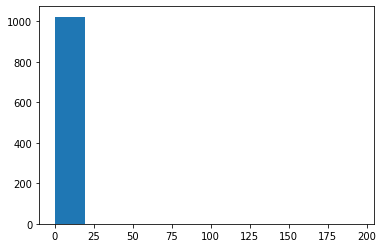

In [31]:
plt.hist(topk_result.sum(axis=-1).data)

tensor(3.0294)
tensor(7.9654)


(array([920.,  61.,  14.,   5.,   6.,   5.,   5.,   2.,   3.,   3.]),
 array([2.6740381e-08, 7.9653978e-01, 1.5930794e+00, 2.3896191e+00,
        3.1861589e+00, 3.9826987e+00, 4.7792382e+00, 5.5757780e+00,
        6.3723178e+00, 7.1688576e+00, 7.9653974e+00], dtype=float32),
 <BarContainer object of 10 artists>)

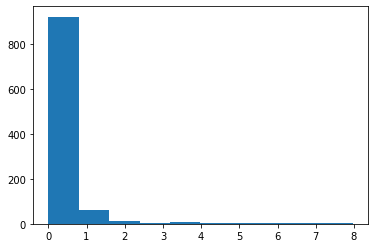

In [35]:
topk_ope = SortedTopK_custom(epsilon=0.00001, max_iter=200)
tokens = torch.randn([1,1024])
print(tokens.max())

topk_result, _ = topk_ope(tokens, 256)
print(topk_result.sum(axis=-1).max())

plt.hist(topk_result.sum(axis=-1).data)

In [38]:
sorted(topk_result.sum(dim=-1).ravel())[-256]

tensor(0.0040)

In [39]:
sorted(topk_result.sum(dim=-1).ravel())[-200]

tensor(0.0100)

In [40]:
(topk_result.sum(dim=-1)>0.9).sum()

tensor(101)